***
<h1>European Capitals Clustering</h1>
<h2>Coursera Capstone Final Project (week 5, part 2)</h2>

**Author: Ivan Letal**

Date: 2018/11/06
***

<p><img src="https://ec.europa.eu/programmes/creative-europe/sites/creative-europe/files/actions-capitals-culture.png" width="450">

<h1>Introduction</h1>

The culture of Europe is rooted in the art, architecture, film, different types of music, literature, and philosophy that originated from the continent of Europe. 

European culture is largely rooted in what is often referred to as its "common cultural heritage". Because of the great number of perspectives which can be taken on the subject, it is impossible to form a single, all-embracing conception of European culture. Nonetheless, there are core elements which are generally agreed upon as forming the cultural foundation of modern Europe. 

If I could describe European culture in few words, I would say Art, Architecture, Music, Science, Cuisine. 

<h1>Objective</h1>

In this project, I will focus only on capital cities in Europe, as we can assume that they well represent their countries and nations' culture.

Using Machine Learning (clustering) I will put capitals in clusters to determine:
<br>
* Similarity or dissimilarity of the cities from cultural point of view
* Classification of capitals into clusters and their visualization

Now, for the sake of the project, I will not focus on cuisine (food and restaurants) to describe the culture, because the data I have mostly contain commercial venues that would have significant impact on comparison. The data I use contain various type of restaurants, who knows Europe will know that nowadays you can find all different types of kitchen in every European country.

As a tourist, you might find this information useful, for example, if you liked Prague (Czech Republic) you might as well like Berlin (Germany).

You can also use the model as a travel agent to recommend your customers different places to visit.

<h1>Data</h1>

The data come from Wikipedia, listing European countries and their capitals. This is pretty straightforward.

https://simple.wikipedia.org/wiki/List_of_European_countries

<p><img src="1.PNG">

To complement the data with geolocations like latitude and longitude, I use Geopy libraries that pulls data from Nominatim. 
Geopy makes it easy for Python developers to locate the coordinates of addresses, cities, countries, and landmarks across the globe using third-party geocoders and other data sources.

https://geopy.readthedocs.io
https://nominatim.openstreetmap.org/

<p><img src="2.PNG" width="700">

The last but not least are data from Foursquare that I access through API. 

https://foursquare.com/

The problem with these data I touched in the Objective section, accuracy of data captured can't determine 100% correct classification in real world. 

But the data are sufficient for this project and study.

<p><img src="3.PNG">

For comparison, I find the text cloud the best.

But in the project (week 5) I will show in detail how Machine Learning evaluates the clusters.

<h1>Methodology</h1>

The data from Wikipedia are scrapped using BeautifulSoup (Python). After that, the data are converted to Pandas (Python) DataFrame and geolocations (from Nominatim's OpenStreetMaps) are added using Geopy (Python). Using FourSquare data, I explore neighborhoods of listed cities for their most frequent venues, converting them to OneHot dataframe and merge with the capital cities data. 

**Using Machine Learning classification method K-Means, I will classify capital cities into clusters.** Finally, each cluster is inspected for typical venue categories that I will present using Word Cluster visualization method.

<h1>Results</h1>

Using the K-Means methodology, the capital cities were divided into ten clusters and displayed on Folium Map (Python).

With geolocations added, various colors indicate belonging to a cluster.

<p><img src="4.PNG" width="700">

Not that geolocations of cluster centroids are any useful here, but for the sake of study purpose we can display centroids on a Folium Map (Python).

<p><img src="5.PNG" width="700">

FourSquare is very useful to explore each city for venues and categorizing them. For example first ten rows of capital Prague (Czech Republic) will give overview of what venues you can expect in the city.

<p><img src="6.PNG" width="700">

Let's use World Cloud to describe similar cities that were discovered using the described method and classified into the same cluster by K-Means (Machine Learning algorithm).

As you can see, Berlin and Prague are similar cities. At least from view of culture. What connects them are: Museum, Theatre, Art, Opera, Concert, Architecture.

<p><img src="8.PNG" width="700">

<h1>Discussion</h1>

K-Means method works well for classification of capital cities. What is debatable are the FourSquare data, as for the project I excluded venues that fall into category of cuisine, food and restaurants. The data that fall into category 'Fun', 'Art' and 'Culture' are considered. From this dataset, the most common venues categories are used for clustering hence comparing two or more cities.

To claim an objective classification you need to understand the data and it takes little experimenting find out the best K for K-Means algorithm, but that's well known problem.

What is especially challenging is tuning the FourSquare data, it very much depends on how you limit the query (API method) and what radius in meters you use. For instance, tiny Vatican City does not contain many venues in the same city radius that was used e.g. for large city of Paris.

Also as you could observe, countries that are not typical in European are considered, that's because part their region is technically in Europe. For example Russia, Turkey, etc.. However, this is valid assumption.

<h1>Conclusion</h1>

FourSquare API is very powerful if used correctly, its advantage is that people use it all around the world. I prefer discussion thread for every venue to learn references when I am looking for trying something new.

Using the described method, I learned that Prague, Berlin, Paris but also Kiev are similar cities in terms of culture, what people like and historic architecture. I have never been in the last 3 out of 4, so I might give it a chance.

One interesting thing that I found using K-Means (K=5) and all venue categories unfiltered, I found that Dublin (capital of Ireland) is an outliner because of vast existence of beer pubs.

<h1>Code</h1>

Use BeautifulSoup to scrape Wikipedia page.

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

request = requests.get('https://simple.wikipedia.org/wiki/List_of_European_countries')
soup = BeautifulSoup(request.content, 'lxml')

Read data from table.

In [2]:
data = {}

table = soup.find_all('table')[0] # first table
first_row = table.find_all('tr')[0] # headers are in the first row
rows = table.find_all('tr')[1:] # table data starts from 2nd row

# read table header
for column in first_row.find_all('th'):
    data[column.text.strip()] = []    
headers = list(data)

# read rest of the table
for row in rows:
    count_column = 0
    for column in row.find_all('td'):
        header = headers[count_column]
        if column.find_all('a'):
            if count_column == 0:
                text = column.find_all('a')[1].text # 2nd link contains the data 'Name'
            elif count_column == 4:
                text = column.find_all('a')[0].text # 1st link contains the data for column 'Capital'
        else:
            text = column.text.strip()        
        data[header].append(text)
        count_column = count_column + 1    

Use the data to create Pandas DataFrame.

In [3]:
df = pd.DataFrame.from_dict(data)
df.columns = ['Name', 'Area', 'Population', 'Density', 'Capital'] # rename column names
df.head()

,Name,Area,Population,Density,Capital
0,Albania,"28,748","2,994,667",104.1,Tirana
1,Andorra,468,"84,082",146.2,Andorra la Vella
2,Armenia,"29,800","2,967,975",99.5,Yerevan
3,Austria,"83,858","8,217,280",97.9,Vienna
4,Azerbaijan,"86,600","9,165,000",105.8,Baku


In [4]:
df.shape

(51, 5)

Install geocoder that provides geolocation (latitude and longitude).

In [5]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.17.0               |             py_0          49 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          82 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.17.0-py_0 conda-forge


geopy-1.17.0         | 49 KB     | ##################################### | 100% 
geographiclib-1.49   | 32 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


Define function that will return geolocation data.

In [6]:
def get_loc(address):
    geolocator = Nominatim()
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude, longitude

Test the function on some capital city.

In [7]:
latitude, longitude = get_loc('Prague, Czech Republic')
print('Geolocations of Prague, Czech Republic are: {}, {}'.format(latitude, longitude))

/home/jupyterlab/conda/lib/python3.6/site-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


Geolocations of Prague, Czech Republic are: 50.0874654, 14.4212535


Get geolocation of every capital city in the dataframe.

In [8]:
for index, row in df.iterrows():
    name = row['Name']
    capital = row['Capital']
    try:
        latitude_, longitude_ = get_loc(capital + ', ' + name)        
    except:
        print('No geolocation was found for index {}: {}, {}'.format(index, capital, name)) # for debugging purposes, print all records that were not found        
    df.set_value(index, 'Latitude', latitude_)
    df.set_value(index, 'Longitude', longitude_)     
df.head()

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


,Name,Area,Population,Density,Capital,Latitude,Longitude
0,Albania,"28,748","2,994,667",104.1,Tirana,41.327946,19.818532
1,Andorra,468,"84,082",146.2,Andorra la Vella,42.506939,1.521247
2,Armenia,"29,800","2,967,975",99.5,Yerevan,40.164313,44.531733
3,Austria,"83,858","8,217,280",97.9,Vienna,48.208354,16.372504
4,Azerbaijan,"86,600","9,165,000",105.8,Baku,40.375443,49.832675


Install Folium for visulization of the data on a map.

In [9]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    altair-2.3.0               |        py36_1001         533 KB  conda-forge
    pandas-0.23.4              |   py36hf8a1672_0        27.8 MB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        28.4 MB

The following NEW packages will be INSTALLED:

    altair:  2.3.0-py36_1001       conda-forge
    branca:  0.3.1-py_0            conda-forge
    folium:  0.5.0-py_0            conda-forge
    v

Create map of Europe using latitude and longitude values.

In [10]:
map_europe = folium.Map(location=[latitude, longitude], zoom_start=4)

# add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Capital']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_europe)  
    
map_europe

Use FourSquare credentials and define constants for REST API request.

In [11]:
CLIENT_ID = 'ZDVUXK0JN31MZGHTIBO1BX2BBWUX2L2ZN03POBLWCUSVWTOS' # your Foursquare ID
CLIENT_SECRET = 'NO5AL5DYPJDZ1BO4Y3MLN23RTZ0NIP2VU2AVI21QOMMTU5CO' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 20
RADIUS = 5000
QUERY = 'fun'

Define function that uses REST API to explore venues in given location.

In [12]:
def getNearbyVenues(names, latitudes, longitudes, query=QUERY, radius=RADIUS, LIMIT=LIMIT):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            query,
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng,            
            v['venue']['name'], 
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Capital', 
                  'Capital Latitude', 
                  'Capital Longitude', 
                  'Venue',
                  'Venue id',                
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category'
                             
                   ]
    
    return(nearby_venues)

Use the function on the dataframe.

In [13]:
capital_venues = getNearbyVenues(names=df['Capital'],
                                 latitudes=df['Latitude'],
                                 longitudes=df['Longitude'])
print('There are {} uniques categories.'.format(len(capital_venues['Venue Category'].unique())))

There are 112 uniques categories.


Standardize data by OneHot encoding, that is neccesary if working non-numeric data. 

In [14]:
# one hot encoding
df_onehot = pd.get_dummies(capital_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
df_onehot['Capital'] = capital_venues['Capital'] 

# move neighborhood column to the first column
fixed_columns = ['Capital'] + list(df_onehot.columns.drop('Capital'))
df_onehot = df_onehot[fixed_columns]

In [15]:
capital_venues.groupby('Capital').count().head(25)

,Capital Latitude,Capital Longitude,Venue,Venue id,Venue Latitude,Venue Longitude,Venue Category
Capital,,,,,,,
Amsterdam,20,20,20,20,20,20,20
Andorra la Vella,13,13,13,13,13,13,13
Ankara,20,20,20,20,20,20,20
Astana,20,20,20,20,20,20,20
Athens,20,20,20,20,20,20,20
Baku,20,20,20,20,20,20,20
Belgrade,20,20,20,20,20,20,20
Berlin,20,20,20,20,20,20,20
Bern,20,20,20,20,20,20,20


In [16]:
df_onehot.head()

,Capital,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Bar,Baseball Stadium,Basketball Stadium,Beer Garden,...,Theme Park,Theme Park Ride / Attraction,Toy / Game Store,Trail,University,Water Park,Waterfront,Wine Bar,Winery,Zoo
0,Tirana,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Tirana,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Tirana,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Tirana,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Tirana,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Define function that returns most common venues.

In [17]:
capitals_grouped = df_onehot.groupby('Capital').mean().reset_index()

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Run the function and get new dataframe.

In [18]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Capital']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
capitals_venues_sorted = pd.DataFrame(columns=columns)
capitals_venues_sorted['Capital'] = capitals_grouped['Capital']

for ind in np.arange(capitals_grouped.shape[0]):
    capitals_venues_sorted.iloc[ind, 1:] = return_most_common_venues(capitals_grouped.iloc[ind, :], num_top_venues)
    
capitals_grouped.head()

,Capital,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Bar,Baseball Stadium,Basketball Stadium,Beer Garden,...,Theme Park,Theme Park Ride / Attraction,Toy / Game Store,Trail,University,Water Park,Waterfront,Wine Bar,Winery,Zoo
0,Amsterdam,0.0,0.05,0.00,0.05,0.0,0.00,0.0,0.0,0.0,...,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Andorra la Vella,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Ankara,0.0,0.10,0.35,0.00,0.0,0.05,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Astana,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Athens,0.0,0.00,0.05,0.10,0.0,0.15,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Print most common venus for given cities, just a taste of it.

In [19]:
num_top_venues = 5
capital_filter = ['Dublin', 'Prague']

for hood in capitals_grouped['Capital']:
    if hood in capital_filter:
        print("----"+hood+"----")
        temp = capitals_grouped[capitals_grouped['Capital'] == hood].T.reset_index()
        temp.columns = ['venue','freq']
        temp = temp.iloc[1:]
        temp['freq'] = temp['freq'].astype(float)
        temp = temp.round({'freq': 2})
        print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
        print('\n')

----Dublin----
                 venue  freq
0              Theater  0.25
1                 Park  0.20
2           Art Museum  0.10
3  Indie Movie Theater  0.10
4          Post Office  0.05


----Prague----
                 venue  freq
0              Theater   0.1
1          Art Gallery   0.1
2                  Bar   0.1
3         Concert Hall   0.1
4  Indie Movie Theater   0.1




Use K-Means clustering algorithm. K=10.

In [20]:
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 10

capitals_grouped_clustering = capitals_grouped.drop('Capital', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(capitals_grouped_clustering)

capitals_merged = df

# add clustering labels
capitals_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
capitals_merged = capitals_merged.join(capitals_venues_sorted.set_index('Capital'), on='Capital')

capitals_merged.head()

,Name,Area,Population,Density,Capital,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Albania,"28,748","2,994,667",104.1,Tirana,41.327946,19.818532,5,Park,Concert Hall,Historic Site,History Museum,Casino
1,Andorra,468,"84,082",146.2,Andorra la Vella,42.506939,1.521247,7,Stadium,Park,Historic Site,Music Venue,Public Art
2,Armenia,"29,800","2,967,975",99.5,Yerevan,40.164313,44.531733,2,Park,Art Gallery,Museum,Mediterranean Restaurant,Sculpture Garden
3,Austria,"83,858","8,217,280",97.9,Vienna,48.208354,16.372504,8,Park,Art Museum,Concert Hall,Theater,History Museum
4,Azerbaijan,"86,600","9,165,000",105.8,Baku,40.375443,49.832675,4,Park,Historic Site,Movie Theater,Theater,Plaza


Put data on Folium map.

In [21]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=4)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(capitals_merged['Latitude'], capitals_merged['Longitude'], capitals_merged['Capital'], capitals_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [22]:
df.head()

,Name,Area,Population,Density,Capital,Latitude,Longitude,Cluster Labels
0,Albania,"28,748","2,994,667",104.1,Tirana,41.327946,19.818532,5
1,Andorra,468,"84,082",146.2,Andorra la Vella,42.506939,1.521247,7
2,Armenia,"29,800","2,967,975",99.5,Yerevan,40.164313,44.531733,2
3,Austria,"83,858","8,217,280",97.9,Vienna,48.208354,16.372504,8
4,Azerbaijan,"86,600","9,165,000",105.8,Baku,40.375443,49.832675,4


Check centroids.

In [23]:
df['Cluster'] = df['Cluster Labels']
df.groupby('Cluster').mean()

,Latitude,Longitude,Cluster Labels
Cluster,,,
0,49.881365,11.905728,0
1,46.168856,23.718637,1
2,46.822362,23.115121,2
3,53.349764,-6.260273,3
4,43.757365,29.677736,4
5,48.125606,19.422295,5
6,46.395623,0.597197,6
7,45.278543,11.691765,7
8,50.997357,21.985465,8


Put data on Folium map.

In [24]:
df_centroids = df.groupby('Cluster').mean()

# create map of Europe using latitude and longitude values
map_europe2 = folium.Map(location=[latitude, longitude], zoom_start=4)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to map
for lat, lng, label_clust in zip(df_centroids['Latitude'], df_centroids['Longitude'], df_centroids['Cluster Labels']):    
    label = folium.Popup('Cluster: ' + str(label_clust), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color=rainbow[int(label_clust)-1],
        fill=True,
        fill_color=rainbow[int(label_clust)-1],
        fill_opacity=0.7,
        parse_html=False).add_to(map_europe2)  
    
map_europe2

For instance, let's see what is in cluster 8.

In [25]:
capitals_merged.loc[capitals_merged['Cluster Labels'] == 8, capitals_merged.columns[[4] + list(range(5, capitals_merged.shape[1]))]]

,Capital,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
3,Vienna,48.208354,16.372504,8,Park,Art Museum,Concert Hall,Theater,History Museum
5,Minsk,53.902334,27.561879,8,Arcade,Park,Theater,Arts & Crafts Store,Museum
13,Tallinn,59.437216,24.745369,8,Theater,Movie Theater,Historic Site,Park,Dance Studio
33,Podgorica,42.441524,19.262108,8,Jazz Club,Park,American Restaurant,Theater,Soccer Stadium


Pick a random city to demonstrate World Cloud.

In [26]:
loc_berlin = df[df['Capital'] == "Berlin"]
loc_berlin

,Name,Area,Population,Density,Capital,Latitude,Longitude,Cluster Labels,Cluster
17,Germany,"357,021","81,440,000",228.1,Berlin,52.517037,13.38886,0,0


First, let's create the GET request URL.

In [27]:
LIMIT = 150 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
query = 'fun'
lat =  float(loc_berlin['Latitude'])
lon = float(loc_berlin['Longitude'])

url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lon, VERSION, query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=ZDVUXK0JN31MZGHTIBO1BX2BBWUX2L2ZN03POBLWCUSVWTOS&client_secret=NO5AL5DYPJDZ1BO4Y3MLN23RTZ0NIP2VU2AVI21QOMMTU5CO&ll=52.5170365,13.3888599&v=20180605&query=fun&radius=500&limit=150'

In [28]:
results = requests.get(url).json()
'There are {} popular spots around.'.format(len(results['response']['groups'][0]['items']))

'There are 23 popular spots around.'

In [29]:
items = results['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '4adcda8af964a520bd4921e3',
  'name': 'Komische Oper',
  'location': {'address': 'Behrenstr. 55-57',
   'lat': 52.51596828902978,
   'lng': 13.38670069725068,
   'labeledLatLngs': [{'label': 'display',
     'lat': 52.51596828902978,
     'lng': 13.38670069725068}],
   'distance': 188,
   'postalCode': '10117',
   'cc': 'DE',
   'neighborhood': 'Unter den Linden',
   'city': 'Berlin',
   'state': 'Berlin',
   'country': 'Deutschland',
   'formattedAddress': ['Behrenstr. 55-57', '10117 Berlin', 'Deutschland']},
  'categories': [{'id': '4bf58dd8d48988d136941735',
    'name': 'Opera House',
    'pluralName': 'Opera Houses',
    'shortName': 'Opera House',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/performingarts_operahouse_',
     'suffix': '.png'},
    'primary': True}],
  'photos': {'count':

In [30]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

 Transform JSON file into a pandas dataframe.

In [31]:
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(10)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Komische Oper,Opera House,Behrenstr. 55-57,DE,Berlin,Deutschland,NaN,188,"[Behrenstr. 55-57, 10117 Berlin, Deutschland]","[{'label': 'display', 'lat': 52.51596828902978...",52.515968,13.386701,Unter den Linden,10117,Berlin,4adcda8af964a520bd4921e3
1,Reiterstandbild Friedrich der Große,Outdoor Sculpture,Unter den Linden,DE,Berlin,Deutschland,Universitätsstr.,273,"[Unter den Linden (Universitätsstr.), 10117 Be...","[{'label': 'display', 'lat': 52.51737006230174...",52.517370,13.392854,NaN,10117,Berlin,500fd5cae4b0899ebaa985ac
2,Konzerthaus Berlin,Concert Hall,Gendarmenmarkt,DE,Berlin,Deutschland,Charlottenstr.,429,"[Gendarmenmarkt (Charlottenstr.), 10117 Berlin...","[{'label': 'display', 'lat': 52.513652, 'lng':...",52.513652,13.391911,NaN,10117,Berlin,4adcda7cf964a520584721e3
3,Tränenpalast,Historic Site,Reichstagufer 17,DE,Berlin,Deutschland,NaN,440,"[Reichstagufer 17, 10117 Berlin, Deutschland]","[{'label': 'display', 'lat': 52.52085424559891...",52.520854,13.387162,NaN,10117,Berlin,4cc9350ed147a09328aee5ae
4,Kathedrale St. Hedwig,Church,Hinter der Katholischen Kirche 3,DE,Berlin,Deutschland,NaN,404,"[Hinter der Katholischen Kirche 3, 10117 Berli...","[{'label': 'display', 'lat': 52.51584040860027...",52.515840,13.394501,NaN,10117,Berlin,4d60f2631ee8721ee0d3b021
5,Großer Saal,Concert Hall,Gendarmenmarkt 3,DE,Berlin,Deutschland,NaN,446,"[Gendarmenmarkt 3, 10117 Berlin, Deutschland]","[{'label': 'display', 'lat': 52.51371886198565...",52.513719,13.392559,NaN,10117,Berlin,57b9e6a5498e3c02814928f7
6,Staatsoper Unter den Linden,Opera House,Unter den Linden 7,DE,Berlin,Deutschland,NaN,392,"[Unter den Linden 7, 10117 Berlin, Deutschland]","[{'label': 'display', 'lat': 52.51702391025495...",52.517024,13.394651,NaN,10117,Berlin,4adcda8af964a520be4921e3
7,Maxim Gorki Theater,Theater,Am Festungsgraben 1,DE,Berlin,Deutschland,NaN,481,"[Am Festungsgraben 1, 10117 Berlin, Deutschland]","[{'label': 'display', 'lat': 52.51894077519612...",52.518941,13.395245,NaN,10117,Berlin,4adcda89f964a520954921e3
8,Admiralspalast Studio,Music Venue,Friedrichstr. 101,DE,Berlin,Deutschland,NaN,417,"[Friedrichstr. 101, 10117 Berlin, Deutschland]","[{'label': 'display', 'lat': 52.52078466049450...",52.520785,13.388889,NaN,10117,Berlin,4adcda8cf964a5200e4a21e3
9,Admiralspalast,Theater,Friedrichstr. 101,DE,Berlin,Deutschland,NaN,424,"[Friedrichstr. 101, 10117 Berlin, Deutschland]","[{'label': 'display', 'lat': 52.52084960422215...",52.520850,13.389030,NaN,10117,Berlin,4b3aca24f964a520776e25e3


In [32]:
newTest = dataframe_filtered[['name', 'categories']]
newTest

,name,categories
0,Komische Oper,Opera House
1,Reiterstandbild Friedrich der Große,Outdoor Sculpture
2,Konzerthaus Berlin,Concert Hall
3,Tränenpalast,Historic Site
4,Kathedrale St. Hedwig,Church
5,Großer Saal,Concert Hall
6,Staatsoper Unter den Linden,Opera House
7,Maxim Gorki Theater,Theater
8,Admiralspalast Studio,Music Venue
9,Admiralspalast,Theater


In [33]:
print(dataframe_filtered.categories.unique())

['Opera House' 'Outdoor Sculpture' 'Concert Hall' 'Historic Site' 'Church'
 'Theater' 'Music Venue' 'Cocktail Bar' 'Art Museum' 'History Museum'
 'Museum' 'Comedy Club' 'Cultural Center' 'Nightclub' 'Video Game Store'
 'Dance Studio' 'Park']


Install World Cloud package.

In [34]:
!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs: 
    - wordcloud==1.4.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wordcloud-1.4.1            |           py36_0         324 KB  conda-forge

The following NEW packages will be INSTALLED:

    wordcloud: 1.4.1-py36_0 conda-forge


wordcloud-1.4.1      | 324 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Wordcloud is installed and imported!


In [35]:
newTest_words = dataframe_filtered[['categories']]
newTest_words.head()

,categories
0,Opera House
1,Outdoor Sculpture
2,Concert Hall
3,Historic Site
4,Church


In [36]:
newTest_words.to_csv('berlin.csv', sep=',', index=False)

In [37]:
myTest = open('berlin.csv', 'r').read()

In [38]:
stopwords = set(STOPWORDS)

Define World Cloud object.

In [39]:
capital_wc = WordCloud(
background_color='white',
    max_words=2000,
    stopwords=stopwords
)

capital_wc.generate(myTest)

Display World Cloud figure.

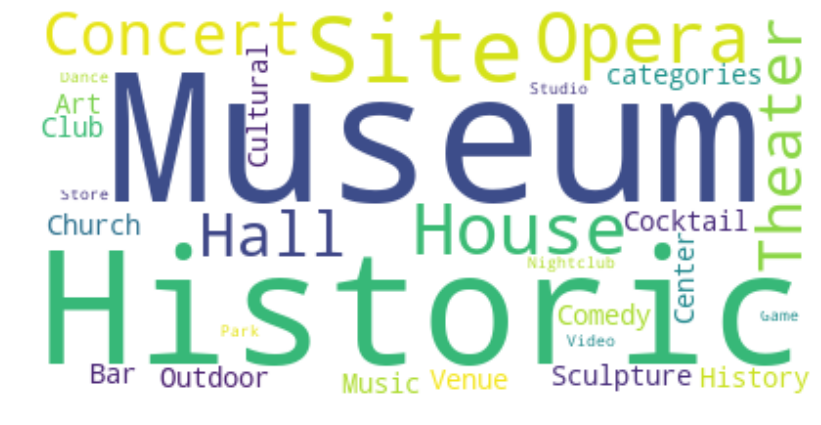

In [40]:
import matplotlib.pyplot as plt

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height
plt.imshow(capital_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [41]:
# Uncomment this if you want to save the picture.
#fig.savefig('berlin.png')

For comparison, let's see how are two cities from same cluster similar.

<table>
    <tr>
        <td><h1><p>Prague
        <td><h1><p>Berlin
    <tr>    
    <tr>
        <td><img src="prague.png" height="252" width="324">
        <td><img src="berlin.png" height="252" width="324">
    </tr>
</table>